# Diffraction grating for vector beams: XZ frame 

In [15]:
from diffractio import np, plt
from diffractio import degrees, um
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.vector_fields_XZ import Vector_field_XZ

In [2]:
from py_pol.jones_vector import Jones_vector

16.0


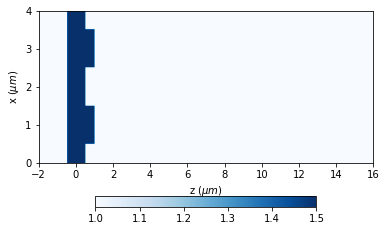

In [3]:
scale='auto'

period = 2*um
wavelength = .5 * um
z_talbot = 2*period**2/wavelength
print(z_talbot)

x0 = np.linspace(- 0, 2*period, 512)
z0 = np.linspace(-2 * um, 1*z_talbot, 512)
# z0 = np.linspace(-2 * um, 10, 512)

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta = 0*degrees)

u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u_xz.incident_field(u0)

u_xz.ronchi_grating(r0=(0*um, 0*um), period=period, fill_factor=0.5, 
                    height = 1*wavelength, refractive_index=1.5, length = 32*wavelength, Dx = 0, 
                    heigth_substrate = 1*um,
                    refractive_index_substrate=1.5, angle=0)

u_xz.draw_refractive_index(scale=scale, draw_borders=False, colorbar_kind='horizontal')


In [4]:

j0 = Jones_vector().general_azimuth_ellipticity(azimuth=45*degrees, ellipticity=0*degrees)
print(j0)


E = 
[+0.707]   
[+0.707]   



In [5]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.refractive_index_from_scalarXZ(u_xz)
EH_xz.incident_field(u0=u0, j0=j0)

In [6]:
EH_xz.FP_WPM(has_edges=False, verbose=False)

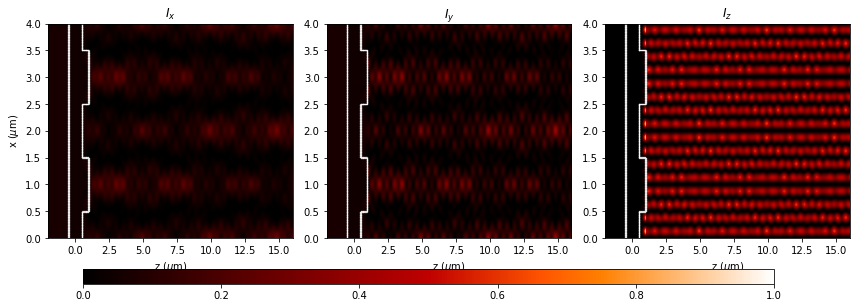

In [7]:
EH_xz.draw('intensities', logarithm=0,  scale=scale, ms=.5)


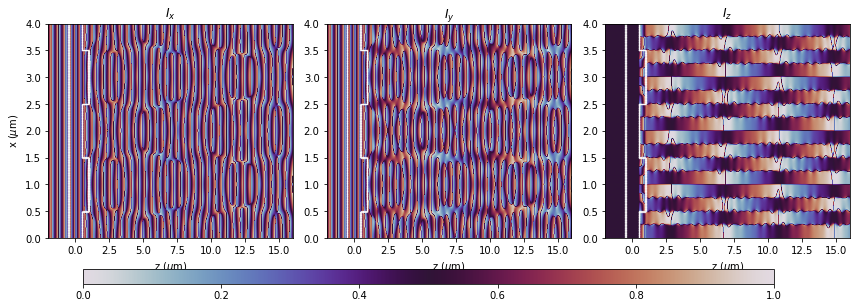

In [8]:
EH_xz.draw('phases', scale=scale, ms=.5)

0.0


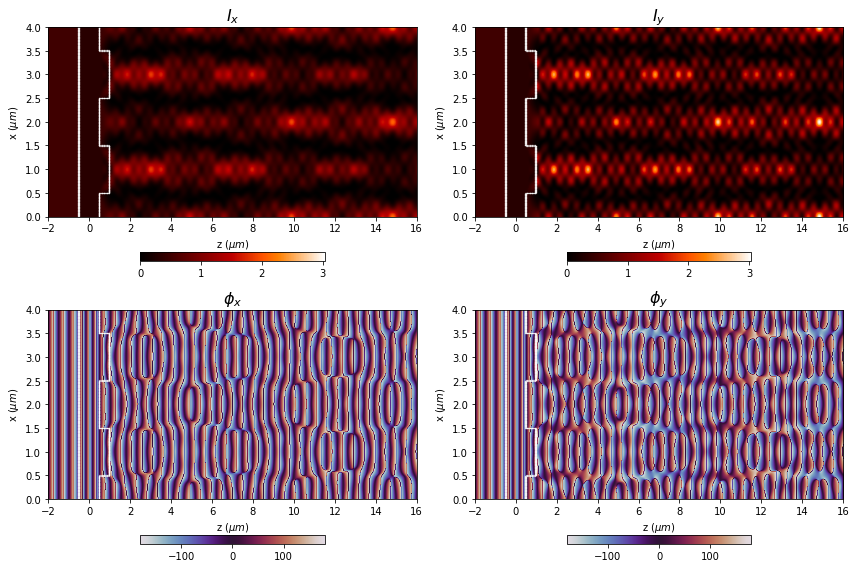

In [9]:
EH_xz.draw('fields', logarithm=False, scale=scale, ms=.5)

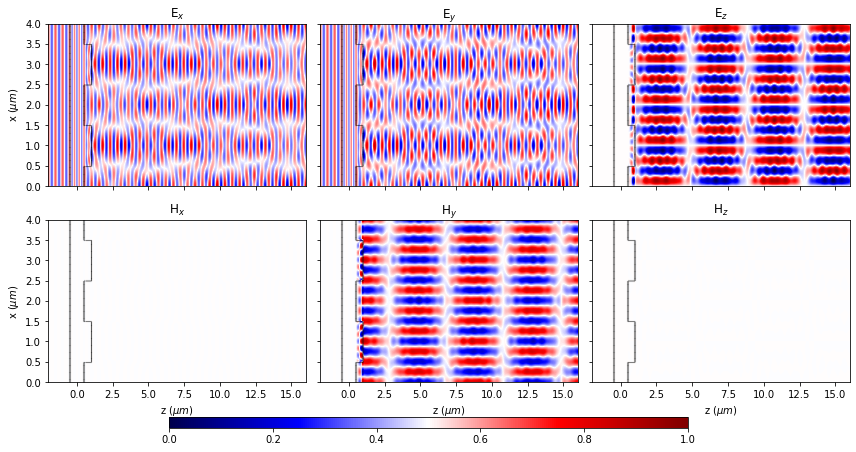

In [10]:
EH_xz.draw('EH', logarithm=False, scale=scale, color='k.')

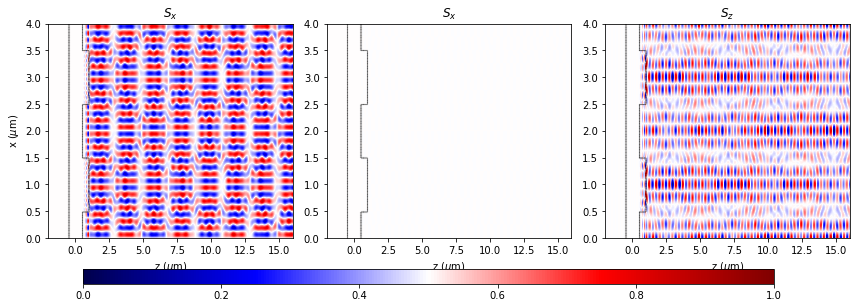

In [11]:
P_vector = EH_xz.draw('poynting_vector', scale=scale, color='k.')

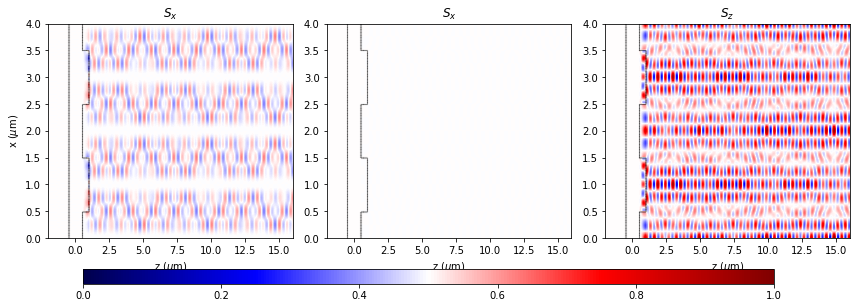

In [12]:
EH_xz.draw('poynting_vector_averaged', scale=scale, color='k.')

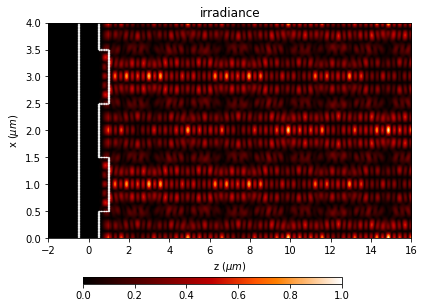

In [13]:
Irr= EH_xz.draw('irradiance', mode='modulus', scale=scale, color='w.', ms=.5)

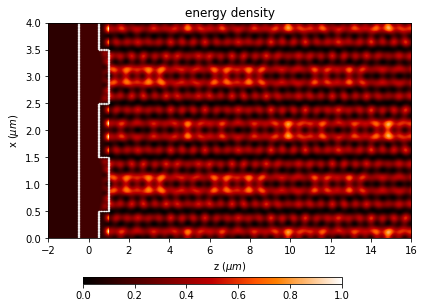

In [14]:
EH_xz.draw('energy_density', scale=scale, color='w.', ms=.5)